In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import gensim
import gensim.corpora as corpora
from collections import Counter

In [3]:
data_path = os.getcwd()
data_path_pre = data_path 
if not os.path.isdir(data_path_pre):
    os.mkdir(data_path_pre)
data_path_pre

'c:\\Users\\Fuzzy\\Desktop\\yi\\proposal\\formal'

In [4]:
df = pd.read_csv('wos_patent1519.csv')
print(df.columns)

print("------------------------------------")
print(" ")

Abstract = df['Abstract'].values.tolist()
Title = df['Article Title'].values.tolist()
print(Title)
print(Abstract)

Index(['Article Title', 'Keywords', 'Abstract', 'Publication Year',
       'Research Areas'],
      dtype='object')
------------------------------------
 
["Mr Skemp's preposterous provision: the drafting of the Patents Act 1977 and harmonization in the 1970s", 'An Intellectual Property Primer for Nanomedical Researchers and Engineers', "The compliance of South Africa's patents compulsory licensing regime to the TRIPs Agreement", 'Minutes of Evidence of the Select Committee on the Letters Patent for Invention Act 1835', 'Commercial Law', 'Biotechnology patenting caught between Union law and EPC law: European bundle patents, unitary patents and intentional harmonization of decisions in the internal market', 'SALVAGING THE LAW OF PATENT VENUE: BRUNETTE, TC HEARTLAND, AND THE VENUE CLARIFICATION ACT', 'Licensing Issues in Nanotechnology', 'Pharmaceutical patents', 'The need for a new Copyright Act: a case study in law reform The Herchel Smith Intellectual Property Lecture 2014', 'Patentin

In [ ]:
df = pd.read_csv('wos_patent.csv')
print(df.columns)

print("------------------------------------")
print(" ")

Abstract = df['Abstract'].values.tolist()
Title = df['Article Title'].values.tolist()
print(Title)
print(Abstract)

Index(['Article Title', 'Keywords', 'Abstract', 'Publication Year',
       'Research Areas'],
      dtype='object')
------------------------------------
 
["Mr Skemp's preposterous provision: the drafting of the Patents Act 1977 and harmonization in the 1970s", 'An Intellectual Property Primer for Nanomedical Researchers and Engineers', "The compliance of South Africa's patents compulsory licensing regime to the TRIPs Agreement", 'Minutes of Evidence of the Select Committee on the Letters Patent for Invention Act 1835', 'Commercial Law', 'Biotechnology patenting caught between Union law and EPC law: European bundle patents, unitary patents and intentional harmonization of decisions in the internal market', 'SALVAGING THE LAW OF PATENT VENUE: BRUNETTE, TC HEARTLAND, AND THE VENUE CLARIFICATION ACT', 'Licensing Issues in Nanotechnology', 'Pharmaceutical patents', 'The need for a new Copyright Act: a case study in law reform The Herchel Smith Intellectual Property Lecture 2014', 'Patentin

In [ ]:
import pandas as pd

# 讀取 CSV 文件
df = pd.read_csv('wos_patent.csv')

# 填充 Abstract 和 Title 列中的 NaN 值為空字串，並將元素轉換為字串
Abstract = df['Abstract'].fillna('').astype(str).values.tolist()
Title = df['Article Title'].fillna('').astype(str).values.tolist()

# 將 Title 和 Abstract 列內容連接，並生成最終數據
data = [f'{Title[i]}. {Abstract[i]}' for i in range(len(Abstract))]

# 打印結果
for item in data:
    print(item)


Mr Skemp's preposterous provision: the drafting of the Patents Act 1977 and harmonization in the 1970s. The Patents Act 1977 created a new law of patents based on the European Patent Convention (1973). However, the wording of the Act did not 'copy out' the text of the Convention, but was drafted in traditional statutory language to give it effect. Nevertheless, to facilitate harmonization, the Act included a unique provision in British law: section 130(7). Both the drafter's approach and this 'preposterous' provision have been lamented by the patent judiciary for nearly four decades. But is this criticism fair?
An Intellectual Property Primer for Nanomedical Researchers and Engineers. 
The compliance of South Africa's patents compulsory licensing regime to the TRIPs Agreement. In South Africa, patents compulsory licences can be issued under the Patents Act or Competition Act although the latter is not explicit. Whereas there has not been a single compulsory licence issued through the P

In [7]:
data_lemmatized = np.load(rf'{data_path}\\corpus\\data_lemmatized.npy',allow_pickle=True)
id2word         = np.load(rf'{data_path}\\corpus\\id2word.npy',allow_pickle=True)
corpus          = np.load(rf'{data_path}\\corpus\\word_count_corpus_pmi.npy',allow_pickle=True).tolist()
cp              = np.load(rf'{data_path}\\corpus\\word_count.npy',allow_pickle=True)

#id2word = corpora.Dictionary(data_lemmatized)

In [ ]:
### 這個是錯的，不是論文用的程式碼

# 定義要處理的檔案
files = {
    'PMI':      f'{data_path}\\corpus\\word_count_corpus_pmi.npy',
    'TFIDF':    f'{data_path}\\corpus\\word_count_corpus_tfidf.npy',
    'Both':     f'{data_path}\\corpus\\word_count_corpus_pmi_tfidf.npy',
    'Original': f'{data_path}\\corpus\\word_count.npy'
}

# 統計函式
def get_vocab_stats(corpus):
    vocab = set()
    total_tokens = 0
    for doc in corpus:
        for word, freq in doc:
            vocab.add(word)
            total_tokens += freq
    return len(vocab), total_tokens

# 主迴圈
for label, path in files.items():
    corpus = np.load(path, allow_pickle=True).tolist()
    vocab_size, total_tokens = get_vocab_stats(corpus)
    print(f"【{label}】")
    print(f"  ➤ 詞彙總數（去重 vocab）：{vocab_size}")
    print(f"  ➤ 總詞元數（token 總和）  ：{total_tokens}")
    print("-" * 40)


【PMI】
  ➤ 詞彙總數（去重 vocab）：45479
  ➤ 總詞元數（token 總和）  ：1098524.354758107
----------------------------------------
【TFIDF】
  ➤ 詞彙總數（去重 vocab）：45479
  ➤ 總詞元數（token 總和）  ：23157.058736669595
----------------------------------------
【Both】
  ➤ 詞彙總數（去重 vocab）：45479
  ➤ 總詞元數（token 總和）  ：128873.46400299887
----------------------------------------
【Original】
  ➤ 詞彙總數（去重 vocab）：45479
  ➤ 總詞元數（token 總和）  ：380425
----------------------------------------


In [8]:
from sentence_transformers import SentenceTransformer
BERT    = "sentence-transformers/msmarco-bert-base-dot-v5"
RoBERTa = "all-roberta-large-v1"
MPnet   = "all-mpnet-base-v2"
proto ="all-MiniLM-L6-v2"

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_model = TfidfVectorizer(stop_words="english")

from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

In [10]:
from bertopic import BERTopic

# 將每個文檔轉換為字符串（如果不是字符串的話）
data_lemmatized = [str(doc) for doc in data_lemmatized]
data_lemmatized


["['patents', '1977', 'create', 'law', 'of', 'patent', 'base', 'european', 'patent', 'convention', '1973', 'wording', 'of', 'copy', 'text', 'of', 'convention', 'draft', 'traditional', 'statutory_language', 'facilitate', 'harmonization', 'unique', 'provision', 'british', 'law', '130', '7', 'drafter', 'approach', 'preposterous', 'provision', 'lament', 'patent', 'judiciary', 'decade', 'criticism', 'fair']",
 "['of', 'priority', 'establish', 'paris_convention', 'protection', 'of', 'industrial_property', 'patent', 'applicant', 'claim', 'filing', 'of', 'application', 'subsequent', 'application_file', 'twelve_month', 'paris_convention', 'contracting', 'claim', 'person', 'file', 'application', 'successor', 'title', 'priority_validly', 'claim', 'patent_application', 'patent', 'rely', 'reject', 'revoke_invalidate', 'national', 'regional', 'rule_govern', 'claim_priority', 'priority', 'divide_share', 'transfer_independently', 'of', 'priority', 'application', 'requirement', 'valid_transfer', 'count

In [41]:
# 收集 corpus 中實際出現的詞彙 ID
used_word_ids = set()
for doc in corpus:
    for word_id, _ in doc:
        used_word_ids.add(word_id)

# 用 id2word 查出實際的詞彙
pmi_vocab = [id2word[word_id] for word_id in used_word_ids]

print(f"PMI 篩選後實際保留的唯一詞彙數：{len(pmi_vocab)}")


PMI 篩選後實際保留的唯一詞彙數：45479


In [45]:
import numpy as np
from gensim import corpora

# 載入斷詞結果
data_lemmatized = np.load(rf'{data_path}\\corpus\\data_lemmatized.npy', allow_pickle=True)


# 拿 id2word 內的詞彙總數
total_terms = len(id2word)
print("保留下來的詞彙總數：", total_terms)

total_word_count = sum([freq for doc in corpus for _, freq in doc])
print("所有文件中的詞彙總出現次數：", total_word_count)


保留下來的詞彙總數： 29530
所有文件中的詞彙總出現次數： 327916


In [ ]:
topic_model1.visualize_topics()


In [38]:
# 將每個文檔分詞後加總長度
total_tokens = sum(len(doc.split()) for doc in filtered_docs)

print(f"有效文檔的總詞數（token 數）: {total_tokens}")


有效文檔的總詞數（token 數）: 340578


In [ ]:
sentence_model = SentenceTransformer(RoBERTa)

In [54]:
vectorizer = topic_model.vectorizer_model
print(f"語料庫中被向量化的詞彙數: {len(vectorizer.get_feature_names_out())}")


語料庫中被向量化的詞彙數: 45440


In [21]:
sentence_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)

In [34]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [29]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(proto)  # 或你用的模型
tokenizer = model.tokenizer  # 對應 tokenizer

# 假設 docs 是你的文本列表
total_tokens = 0
for doc in data:
    tokens = tokenizer.encode(doc, add_special_tokens=True)
    total_tokens += len(tokens)

print(f"嵌入模型總共處理了 {total_tokens} 個 tokens")


Token indices sequence length is longer than the specified maximum sequence length for this model (546 > 512). Running this sequence through the model will result in indexing errors


嵌入模型總共處理了 471226 個 tokens


In [66]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [ ]:
import time
import torch

# 选择最佳的 CV 模型
model = SentenceTransformer(BERT)

# 生成大量测试文本
sentences = data_lemmatized 

# 测试嵌入生成时间
start_time = time.time()
embeddings = model.encode(sentences, convert_to_tensor=True)
end_time = time.time()

# 计算每秒生成的 tokens
num_tokens = sum(len(sentence.split()) for sentence in sentences)
tokens_per_second = num_tokens / (end_time - start_time)

print(f"嵌入生成速度: {tokens_per_second:.2f} tokens/s")


You try to use a model that was created with version 3.0.0.dev0, however, your version is 2.4.0. This might cause unexpected behavior or errors. In that case, try to update to the latest version.





嵌入生成速度: 5860.76 tokens/s


In [ ]:
import time
import torch

# 选择最佳的 CV 模型
model = SentenceTransformer(proto)

# 生成大量测试文本
sentences = data_lemmatized 

# 测试嵌入生成时间
start_time = time.time()
embeddings = model.encode(sentences, convert_to_tensor=True)
end_time = time.time()

# 计算每秒生成的 tokens
num_tokens = sum(len(sentence.split()) for sentence in sentences)
tokens_per_second = num_tokens / (end_time - start_time)

print(f"嵌入生成速度: {tokens_per_second:.2f} tokens/s")


嵌入生成速度: 46268.20 tokens/s


In [ ]:
!pip install datasets


In [ ]:
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import scipy.stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 选择嵌入模型
model = SentenceTransformer(BERT)

# 载入 STS-Benchmark 数据集
dataset = load_dataset("glue", "stsb", split="train")  # 使用 GLUE 数据集中的 STS-Benchmark

# 查看数据集中的字段结构
print(dataset[0])

# 使用正确的字段名来提取句子对和人类评分
sentence_pairs = [(example['sentence1'], example['sentence2']) for example in dataset]
human_scores = np.array([example['label'] for example in dataset])  # 使用 'label' 而不是 'score'

# 计算嵌入
sentences1 = [pair[0] for pair in sentence_pairs]
sentences2 = [pair[1] for pair in sentence_pairs]
embeddings1 = model.encode(sentences1, convert_to_numpy=True)
embeddings2 = model.encode(sentences2, convert_to_numpy=True)

# 计算余弦相似度
predicted_similarities = np.array([
    cosine_similarity([emb1], [emb2])[0][0] for emb1, emb2 in zip(embeddings1, embeddings2)
])

# 归一化到 0-5 分数范围（人工评分也是 0-5）
predicted_similarities = (predicted_similarities - predicted_similarities.min()) / \
                         (predicted_similarities.max() - predicted_similarities.min()) * 5

# 计算 Spearman 相关性
spearman_corr, _ = scipy.stats.spearmanr(predicted_similarities, human_scores)

# 计算 Pearson 相关性
pearson_corr, _ = scipy.stats.pearsonr(predicted_similarities, human_scores)

# 计算均方误差（MSE）
mse_score = mean_squared_error(human_scores, predicted_similarities)

print(f"Spearman 相关性: {spearman_corr:.4f}")
print(f"Pearson 相关性: {pearson_corr:.4f}")
print(f"均方误差 (MSE): {mse_score:.4f}")


You try to use a model that was created with version 3.0.0.dev0, however, your version is 2.4.0. This might cause unexpected behavior or errors. In that case, try to update to the latest version.





{'sentence1': 'A plane is taking off.', 'sentence2': 'An air plane is taking off.', 'label': 5.0, 'idx': 0}
Spearman 相关性: 0.7417
Pearson 相关性: 0.7706
均方误差 (MSE): 1.7979


In [ ]:
# 查看数据集字段名，确保 'label' 字段是评分的来源
print(dataset.column_names)

# 打印数据集中的前几条记录，检查 'label' 是否包含有效的评分
print(dataset[:5])  # 打印前5个数据项，检查每个字段


['sentence1', 'sentence2', 'label', 'idx']
{'sentence1': ['A girl is styling her hair.', 'A group of men play soccer on the beach.', "One woman is measuring another woman's ankle.", 'A man is cutting up a cucumber.', 'A man is playing a harp.'], 'sentence2': ['A girl is brushing her hair.', 'A group of boys are playing soccer on the beach.', "A woman measures another woman's ankle.", 'A man is slicing a cucumber.', 'A man is playing a keyboard.'], 'label': [-1.0, -1.0, -1.0, -1.0, -1.0], 'idx': [0, 1, 2, 3, 4]}


In [ ]:
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import scipy.stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 选择嵌入模型
#model_name = "all-MiniLM-L6-v2"  # 你可以换成其他模型
model = SentenceTransformer(BERT)

# 载入 STS-Benchmark 数据集
#dataset = load_dataset("mteb/sts22-crosslingual-sts", "en", split="test")  # 使用 GLUE 数据集中的 STS-Benchmark
dataset = load_dataset("sentence-transformers/stsb", "default", split="train") 
# 查看数据集中的字段结构
print(dataset[0])

# 使用正确的字段名来提取句子对和人类评分
sentence_pairs = [(example['sentence1'], example['sentence2']) for example in dataset]
human_scores = np.array([example['score'] for example in dataset])  # 使用 'label' 而不是 'score'

# 计算嵌入
sentences1 = [pair[0] for pair in sentence_pairs]
sentences2 = [pair[1] for pair in sentence_pairs]
embeddings1 = model.encode(sentences1, convert_to_numpy=True)
embeddings2 = model.encode(sentences2, convert_to_numpy=True)

# 计算余弦相似度
predicted_similarities = np.array([
    cosine_similarity([emb1], [emb2])[0][0] for emb1, emb2 in zip(embeddings1, embeddings2)
])

# 归一化到 0-5 分数范围（人工评分也是 0-5）
predicted_similarities = (predicted_similarities - predicted_similarities.min()) / \
                         (predicted_similarities.max() - predicted_similarities.min()) * 5

# 计算 Spearman 相关性
spearman_corr, _ = scipy.stats.spearmanr(predicted_similarities, human_scores)

# 计算 Pearson 相关性
pearson_corr, _ = scipy.stats.pearsonr(predicted_similarities, human_scores)

# 计算均方误差（MSE）
mse_score = mean_squared_error(human_scores, predicted_similarities)

print(f"Spearman 相关性: {spearman_corr:.4f}")
print(f"Pearson 相关性: {pearson_corr:.4f}")
print(f"均方误差 (MSE): {mse_score:.4f}")


You try to use a model that was created with version 3.0.0.dev0, however, your version is 2.4.0. This might cause unexpected behavior or errors. In that case, try to update to the latest version.





{'sentence1': 'A plane is taking off.', 'sentence2': 'An air plane is taking off.', 'score': 1.0}
Spearman 相关性: 0.7418
Pearson 相关性: 0.7706
均方误差 (MSE): 10.0510


In [ ]:
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import scipy.stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 选择嵌入模型
#model_name = "all-MiniLM-L6-v2"  # 你可以换成其他模型
model = SentenceTransformer(RoBERTa)

# 载入 STS-Benchmark 数据集
#dataset = load_dataset("mteb/sts22-crosslingual-sts", "en", split="validation")  # 使用 GLUE 数据集中的 STS-Benchmark
dataset = load_dataset("sentence-transformers/stsb", "default", split="train") 
# 查看数据集中的字段结构
print(dataset[0])

# 使用正确的字段名来提取句子对和人类评分
sentence_pairs = [(example['sentence1'], example['sentence2']) for example in dataset]
human_scores = np.array([example['score'] for example in dataset])  # 使用 'label' 而不是 'score'

# 计算嵌入
sentences1 = [pair[0] for pair in sentence_pairs]
sentences2 = [pair[1] for pair in sentence_pairs]
embeddings1 = model.encode(sentences1, convert_to_numpy=True)
embeddings2 = model.encode(sentences2, convert_to_numpy=True)

# 计算余弦相似度
predicted_similarities = np.array([
    cosine_similarity([emb1], [emb2])[0][0] for emb1, emb2 in zip(embeddings1, embeddings2)
])

# 归一化到 0-5 分数范围（人工评分也是 0-5）
predicted_similarities = (predicted_similarities - predicted_similarities.min()) / \
                         (predicted_similarities.max() - predicted_similarities.min()) * 5

# 计算 Spearman 相关性
spearman_corr, _ = scipy.stats.spearmanr(predicted_similarities, human_scores)

# 计算 Pearson 相关性
pearson_corr, _ = scipy.stats.pearsonr(predicted_similarities, human_scores)

# 计算均方误差（MSE）
mse_score = mean_squared_error(human_scores, predicted_similarities)

print(f"Spearman 相关性: {spearman_corr:.4f}")
print(f"Pearson 相关性: {pearson_corr:.4f}")
print(f"均方误差 (MSE): {mse_score:.4f}")


{'sentence1': 'A plane is taking off.', 'sentence2': 'An air plane is taking off.', 'score': 1.0}
Spearman 相关性: 0.8484
Pearson 相关性: 0.8624
均方误差 (MSE): 9.9226


In [ ]:
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import scipy.stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 选择嵌入模型
#model_name = "all-MiniLM-L6-v2"  # 你可以换成其他模型
model = SentenceTransformer(proto)

# 载入 STS-Benchmark 数据集
dataset = load_dataset("sentence-transformers/stsb", "default", split="train")  # 使用 GLUE 数据集中的 STS-Benchmark

# 查看数据集中的字段结构
print(dataset[0])

# 使用正确的字段名来提取句子对和人类评分
sentence_pairs = [(example['sentence1'], example['sentence2']) for example in dataset]
human_scores = np.array([example['score'] for example in dataset])  # 使用 'label' 而不是 'score'

# 计算嵌入
sentences1 = [pair[0] for pair in sentence_pairs]
sentences2 = [pair[1] for pair in sentence_pairs]
embeddings1 = model.encode(sentences1, convert_to_numpy=True)
embeddings2 = model.encode(sentences2, convert_to_numpy=True)

# 计算余弦相似度
predicted_similarities = np.array([
    cosine_similarity([emb1], [emb2])[0][0] for emb1, emb2 in zip(embeddings1, embeddings2)
])

# 归一化到 0-5 分数范围（人工评分也是 0-5）
predicted_similarities = (predicted_similarities - predicted_similarities.min()) / \
                         (predicted_similarities.max() - predicted_similarities.min()) * 5

# 计算 Spearman 相关性
spearman_corr, _ = scipy.stats.spearmanr(predicted_similarities, human_scores)

# 计算 Pearson 相关性
pearson_corr, _ = scipy.stats.pearsonr(predicted_similarities, human_scores)

# 计算均方误差（MSE）
mse_score = mean_squared_error(human_scores, predicted_similarities)

print(f"Spearman 相关性: {spearman_corr:.4f}")
print(f"Pearson 相关性: {pearson_corr:.4f}")
print(f"均方误差 (MSE): {mse_score:.4f}")


{'sentence1': 'A plane is taking off.', 'sentence2': 'An air plane is taking off.', 'score': 1.0}
Spearman 相关性: 0.8100
Pearson 相关性: 0.8349
均方误差 (MSE): 9.4669


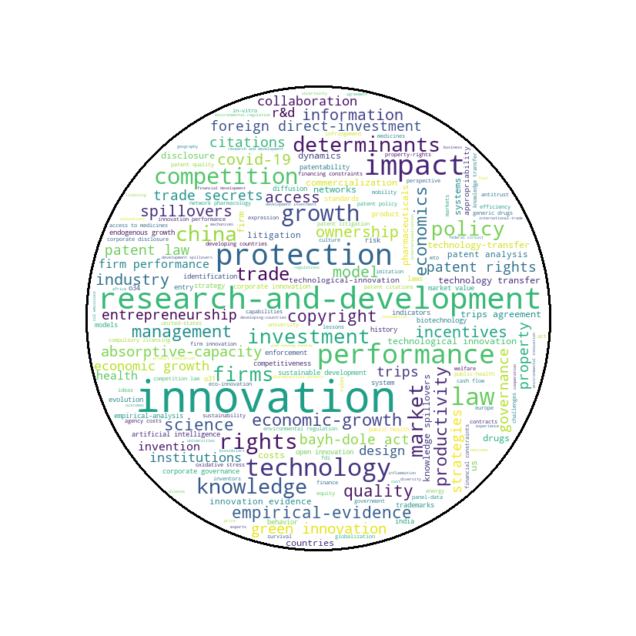

In [86]:
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

# 讀取 JSON
with open("20244.json", "r", encoding="utf-8-sig") as f:
    json_data = json.load(f)

# 確保正確提取 "items"
if "network" in json_data and "items" in json_data["network"]:
    items = json_data["network"]["items"]
else:
    raise KeyError("JSON 格式不正確，找不到 'network' 或 'items'")

# 提取詞頻數據（使用 Occurrences 欄位）
word_freq = {
    item["label"]: item["weights"]["Occurrences"]
    for item in items
    if "Occurrences" in item["weights"]
}

# 讀取圓形遮罩
circle_mask = np.array(Image.open("circle_mask.png"))

# 生成文字雲
wordcloud = WordCloud(
    width=800, height=800,
    background_color="white",
    mask=circle_mask,
    contour_color="black",
    contour_width=2,
    colormap="viridis"
).generate_from_frequencies(word_freq)

# 顯示文字雲
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [24]:
from itertools import chain

# 獲取所有主題的關鍵詞
topics = topic_model1.get_topics()
words_per_topic = [list(zip(*topics[i]))[0] for i in topics if i != -1]  # 排除 -1 (outlier)

# 計算唯一詞彙數
unique_words = set(chain(*words_per_topic))
print(f"主題模型共捕捉 {len(unique_words)} 個獨特詞彙")


NameError: name 'topic_model1' is not defined